In [1]:
import numpy as np
import pandas as pd

In [2]:
#incarceration rates from 2001-2016
incarceration= pd.read_csv("crime_and_incarceration_by_state.csv")
incarceration = incarceration.rename(columns={"jurisdiction":"State"})

#Capitalize all states to follow the format of other datasets
for (i, state) in incarceration["State"].iteritems():
    lst = state.split() #capitalize()
    fixed= []
    for word in lst:
        word= word.capitalize()
        fixed.append(word)
    new= " ".join(fixed)
    incarceration.at[i,"State"] = new

incarceration= incarceration.rename(columns={"year": "Year"})  
incarceration= incarceration.drop("state_population", axis=1)
incarceration.groupby('State', as_index=False)
incarceration.tail(50)

,State,Year,prisoner_count,incarceration rate (%)
750,Alabama,2016,23745,0.488525464
751,Alaska,2016,4378,0.590407297
752,Arizona,2016,42248,0.611523943
753,Arkansas,2016,15833,0.52984525
754,California,2016,129416,0.32933233
755,Colorado,2016,19486,0.352362207
756,Connecticut,2016,15040,0.419211832
757,Delaware,2016,6334,0.664848672
758,Florida,2016,98010,0.474473302
759,Georgia,2016,53433,0.518081915


In [3]:
#drug overdose rate from 1999-2017
drug= pd.read_csv("Drug_Poisoning_Mortality_by_State.csv")
#drop unneeded columns
drug = drug.drop(["Sex","Age Group","Race and Hispanic Origin", "Crude Death Rate",
"Standard Error for Crude Rate","Low Confidence Limit for Crude Rate","Upper Confidence Limit for Crude Rate",
"Standard Error Age-adjusted Rate","Lower Confidence Limit for Age-adjusted Rate","Upper Confidence for Age-adjusted Rate",
"State Crude Rate in Range","US Crude Rate","US Age-adjusted Rate",
"Unit"], axis = 1)
drug= drug.rename(columns={"Age-adjusted Rate":"Overdose Rate"})

states = drug["State"]
for i in range(len(drug)):
    if states[i] == "District of Columbia":
         drug = drug.drop([i])
    if states[i] == "United States":
        drug = drug.drop([i])
drug

#to match incareration data set
drug2 = drug[drug['Year']>2000]
drug2 = drug2[drug2['Year']<2017]
drug2



,State,Year,Deaths,Population,Overdose Rate
2,Alabama,2001,216,4467634,4.8915
3,Alabama,2002,211,4480089,4.7619
4,Alabama,2003,197,4503491,4.4333
5,Alabama,2004,283,4530729,6.3542
6,Alabama,2005,283,4569805,6.3330
...,...,...,...,...,...
3015,Wyoming,2012,98,576412,16.7507
3016,Wyoming,2013,98,582658,17.2422
3017,Wyoming,2014,109,584153,19.3823
3018,Wyoming,2015,96,586107,16.4454


In [4]:
#unemployment rates from 1980-2018
unemployment= pd.read_csv("unemployment_rate.csv")
#drop unneeded years data
unemployment= unemployment.drop(["Fips", "1980", "1981", "1982", "1983", "1984", "1985", "1986",
        "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998"],axis=1)
unemployment = unemployment.rename(columns={"Area":"State"})
unemployment = unemployment.drop([8,51,52,53])
unemployment.head(10)

#of len 20 (num of years), new col for state names
new = []
for i in range(50):
    for x in range(20):
        new.append(unemployment["State"].iloc[i])
#new

years = unemployment.iloc[:,1:]
years = years.transpose()
years

#single unemployment rate col
un = []
for i in range(20):
    un.append(years.iloc[i].tolist())  
#un

unemploy = []
for sublist in un:
    for item in sublist:
        unemploy.append(item)
#unemploy

#col of years
yr = [2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999]
yr2 = []
for i in range(50):
    yr2.append(yr)  
#yr2

year = []
for sublist in yr2:
    for item in sublist:
        year.append(item)
#year

#combining
finalunemployment = pd.DataFrame({"State": new, "Year": year,"Unemployment Rate" :unemploy})
finalunemployment = finalunemployment[finalunemployment["Year"]<2018]

#to match incarceraton data
un2 = finalunemployment[finalunemployment['Year']>2000]
un2 = un2[un2['Year']<2017]
un2


,State,Year,Unemployment Rate
2,Alabama,2016,4.4
3,Alabama,2015,4.6
4,Alabama,2014,5.2
5,Alabama,2013,3.1
6,Alabama,2012,2.9
...,...,...,...
993,Wyoming,2005,3.1
994,Wyoming,2004,2.7
995,Wyoming,2003,3.0
996,Wyoming,2002,4.5


In [5]:
#median income from 1984-2018
income= pd.read_csv("income_fixed.csv")
#drop uneeded years
income= income.drop(["1984 (19)", "1985 (20)", "1986",
        "1987 (21)", "1988", "1989", "1990", "1991", "1992 (22)", "1993 (23)", "1994 (24)", "1995 (25)",
        "1996", "1997", "1998", "2013 (39)"],axis=1)
income = income.rename(columns={"2004(revised)":"2004"})
income = income.rename(columns={"2000 (30)":"2000"})
income = income.rename(columns={"1999 (29)":"1999"})
income = income.rename(columns={"2013 (38)":"2013"})
income = income.rename(columns={"2010 (37)":"2010"})
income = income.rename(columns={"2009 (36)": "2009"})
income = income.drop([8])
#change to wide data
#new state column (this matches the number of years so we need to figure out the specific date range)
#need to drop DC row

years = income.iloc[:,1:]
years = years.transpose()
years

#stack all 0-51 on each other for single col of income
income2 = []
for i in range(20):
    income2.append(years.iloc[i].tolist())  
income2

flat_list = []
for sublist in income2:
    for item in sublist:
        flat_list.append(item)
flat_list

#combining cols
finalincome = pd.DataFrame({"State": new, "Year": year,"Median Income" :flat_list})
finalincome = finalincome[finalincome["Year"]<2018]
finalincome

#to match incarceration data
in2 = finalincome[finalincome['Year']>2000]
in2 = in2[in2['Year']<2017]
in2


,State,Year,Median Income
2,Alabama,2016,"62,283"
3,Alabama,2015,"49,781"
4,Alabama,2014,"70,489"
5,Alabama,2013,"73,034"
6,Alabama,2012,"72,812"
...,...,...,...
993,Wyoming,2005,"46,050"
994,Wyoming,2004,"41,584"
995,Wyoming,2003,"45,693"
996,Wyoming,2002,"45,473"


In [6]:
#merging data
#dataframe 1: with all above data (drug2, un2,in2, incarceration)
new_df = pd.merge(drug2, un2,  how='left', left_on=['State','Year'], right_on = ['State','Year'])
new_df = pd.merge(new_df, in2,  how='left', left_on=['State','Year'], right_on = ['State','Year'])
new_df = pd.merge(new_df, incarceration,  how='inner', left_on=['State','Year'], right_on = ['State','Year'])
new_df.tail(50)
#incarceration rate data has some missing values

,State,Year,Deaths,Population,Overdose Rate,Unemployment Rate,Median Income,prisoner_count,incarceration rate (%)
750,Washington,2015,1094,7170351,14.7417,5.1,"34,299",17222,0.2401835
751,Washington,2016,1102,7288000,14.5105,3.4,"54,251",17228,0.236617994
752,West Virginia,2001,206,1801481,11.4696,3.8,"46,628",3403,0.188953206
753,West Virginia,2002,229,1805414,12.9455,4.1,"50,593",3575,0.198073671
754,West Virginia,2003,262,1812295,15.1210,3.3,"48,177",3790,0.209225809
755,West Virginia,2004,333,1816438,18.8017,4.2,"43,629",3990,0.220132101
756,West Virginia,2005,184,1820492,10.5007,3.7,"29,682",4036,0.222481551
757,West Virginia,2006,362,1827912,20.3521,4.8,"36,995",4367,0.240146937
758,West Virginia,2007,397,1834052,22.4483,6.6,"51,396",4907,0.270800509
759,West Virginia,2008,459,1840310,25.7420,3.9,"36,251",4896,0.269831157


In [7]:
#dataframe 2: without incarceration data (drug, finalunemployment, finalincome) 1999-2017
new_df2 = pd.merge(drug, finalunemployment,  how='left', left_on=['State','Year'], right_on = ['State','Year'])
new_df2 = pd.merge(new_df2, finalincome,how='left', left_on=['State','Year'], right_on = ['State','Year'])
new_df2

,State,Year,Deaths,Population,Overdose Rate,Unemployment Rate,Median Income
0,Alabama,1999,169,4430143,3.8521,3.6,"86,223"
1,Alabama,2000,197,4447100,4.4857,4.0,"58,663"
2,Alabama,2001,216,4467634,4.8915,5.1,"49,973"
3,Alabama,2002,211,4480089,4.7619,4.5,"54,555"
4,Alabama,2003,197,4503491,4.4333,3.3,"63,938"
...,...,...,...,...,...,...,...
945,Wyoming,2013,98,582658,17.2422,3.4,"32,683"
946,Wyoming,2014,109,584153,19.3823,4.6,"39,489"
947,Wyoming,2015,96,586107,16.4454,2.6,"32,663"
948,Wyoming,2016,99,585501,17.5871,3.9,"37,254"


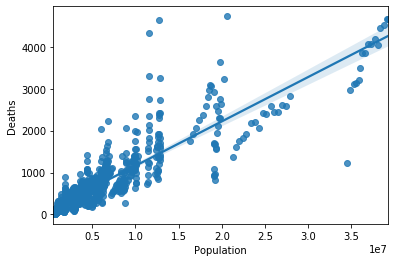

In [8]:
import seaborn as sns
import matplotlib as plt
ax = sns.regplot(x = "Population", y="Deaths", data=new_df)

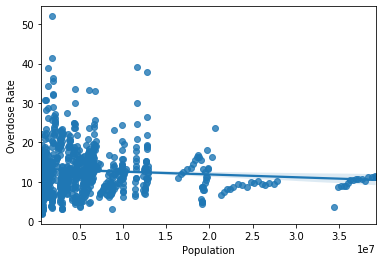

In [9]:
ax = sns.regplot(x = "Population", y="Overdose Rate", data=new_df)

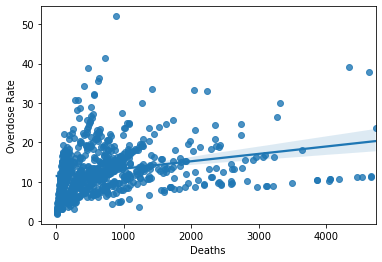

In [10]:
ax = sns.regplot(x = "Deaths", y="Overdose Rate", data=new_df)

In [11]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [123]:
!pip install -q git+https://github.com/tensorflow/docs

In [12]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [131]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [112]:
dataset = new_df.copy()
dataset = dataset.drop(columns=["State", "Year"])
dataset = dataset.replace(',','', regex=True)
dataset = dataset.drop([510])
dataset.to_csv("out.csv")
dataset.astype(float)
dataset["Median Income"] = dataset["Median Income"].astype(float)
dataset["incarceration rate (%)"] = dataset["incarceration rate (%)"].astype(float)

In [113]:
dataset.tail()

,Deaths,Population,Overdose Rate,Unemployment Rate,Median Income,prisoner_count,incarceration rate (%)
795,98,576412,16.7507,4.2,40619.0,2187,0.379275
796,98,582658,17.2422,3.4,32683.0,2288,0.392303
797,109,584153,19.3823,4.6,39489.0,2369,0.405544
798,96,586107,16.4454,2.6,32663.0,2400,0.409482
799,99,585501,17.5871,3.9,37254.0,2352,0.402113


In [114]:
dataset.isna().sum()

Deaths                    0
Population                0
Overdose Rate             0
Unemployment Rate         0
Median Income             0
prisoner_count            0
incarceration rate (%)    0
dtype: int64

In [115]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

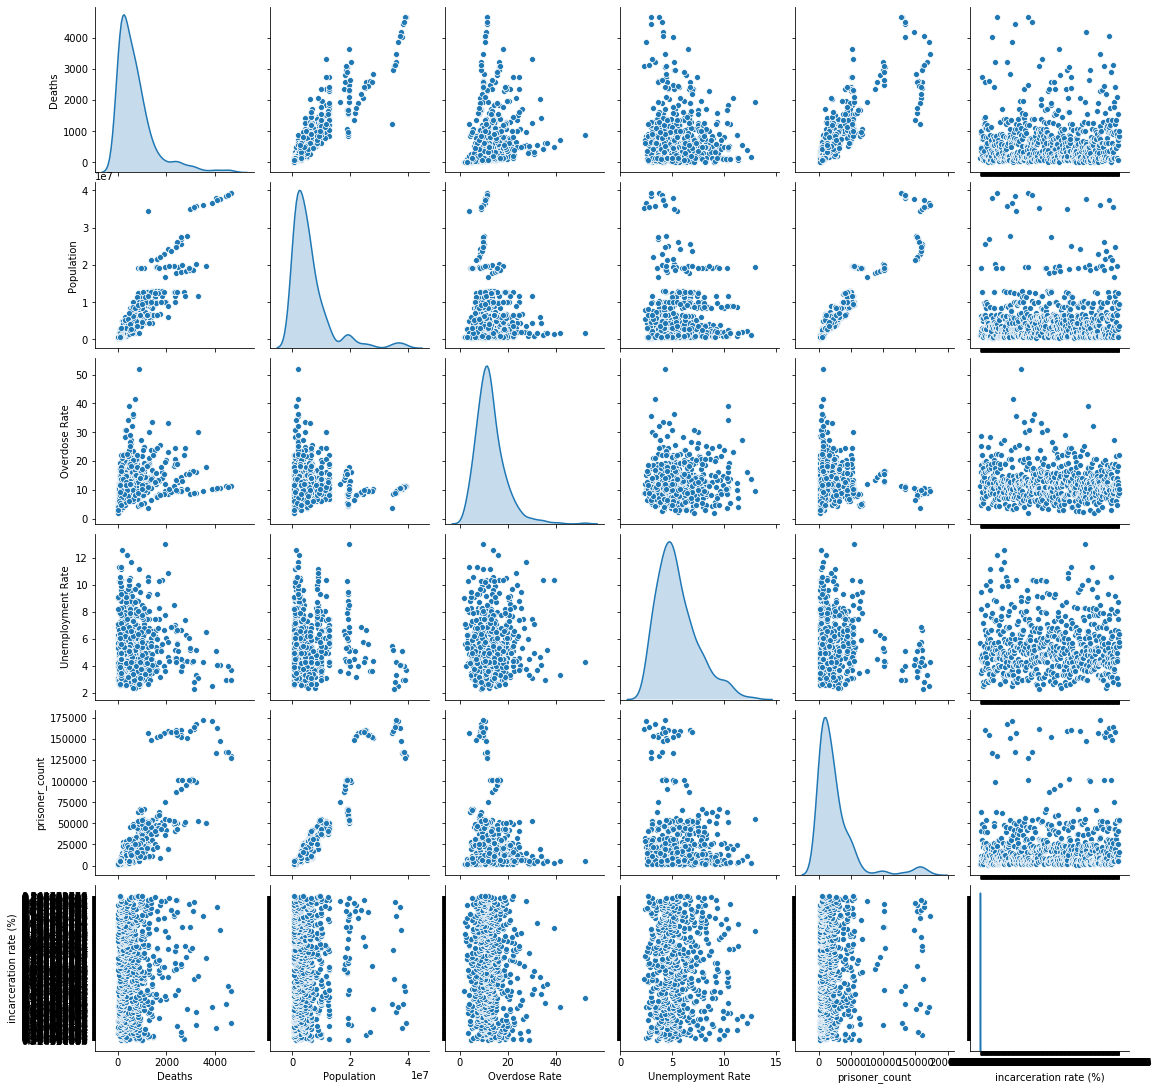

In [17]:
sns.pairplot(train_dataset[["Deaths", "Population", "Overdose Rate", "Unemployment Rate", "Median Income", "prisoner_count", "incarceration rate (%)"]], diag_kind="kde")

In [116]:
train_stats = train_dataset.describe(include='all')
train_stats
train_stats.pop("Deaths")
train_stats = train_stats.transpose()

In [117]:
train_labels = train_dataset.pop('Deaths')
test_labels = test_dataset.pop('Deaths')

In [118]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset.astype(float))
normed_test_data = norm(test_dataset.astype(float))
normed_train_data

,Population,Overdose Rate,Unemployment Rate,Median Income,prisoner_count,incarceration rate (%)
399,-0.006411,1.785562,0.297130,-0.809055,0.215554,0.970475
534,-0.799801,-1.318354,1.814036,-0.404389,-0.737800,-1.238721
345,0.546412,0.191922,-1.017522,1.675718,0.574533,0.368678
40,0.030071,0.551018,-0.461323,1.264319,0.464898,1.548358
642,-0.783626,-1.556770,-0.663577,-0.737407,-0.687821,0.004220
...,...,...,...,...,...,...
464,0.343555,-0.763387,1.611782,-0.790465,0.019723,-0.617597
25,-0.791429,-0.194922,-1.422030,3.154201,-0.615632,2.510684
110,-0.371317,1.526153,-0.006251,-0.890149,-0.288324,0.366038
149,0.440267,-0.631134,0.448821,0.654757,0.841140,1.190996


In [119]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

model = build_model()

In [120]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [121]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.04583401],
       [ 0.23413593],
       [-0.2925402 ],
       [-0.15358527],
       [ 0.26168418],
       [ 0.30095744],
       [ 0.16581434],
       [-0.38585493],
       [-0.12738805],
       [ 0.14049849]], dtype=float32)

In [145]:
EPOCHS = 10000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])



Epoch: 0, loss:207.8587,  mae:9.3324,  mse:207.8587,  val_loss:793.5476,  val_mae:17.5359,  val_mse:793.5475,  
....................................................................................................
Epoch: 100, loss:187.5522,  mae:9.0957,  mse:187.5522,  val_loss:670.6000,  val_mae:16.6909,  val_mse:670.6000,  
....................................................................................................
Epoch: 200, loss:170.0659,  mae:8.6993,  mse:170.0659,  val_loss:794.7980,  val_mae:17.1733,  val_mse:794.7980,  
....................................................................................................
Epoch: 300, loss:139.1932,  mae:7.9250,  mse:139.1932,  val_loss:853.0110,  val_mae:16.9496,  val_mse:853.0110,  
....................................................................................................
Epoch: 400, loss:160.5309,  mae:7.9915,  mse:160.5309,  val_loss:1105.3161,  val_mae:19.3657,  val_mse:1105.3160,  
.........................

In [146]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9995,33.008971,3.793980,33.008972,444.601570,13.053993,444.601562,9995
9996,55.054031,4.713889,55.054028,502.486843,13.729343,502.486847,9996
9997,64.424665,4.614200,64.424667,461.649849,13.359458,461.649841,9997
9998,34.582419,4.135808,34.582417,444.859482,13.205724,444.859497,9998
9999,68.730358,4.933942,68.730370,448.858482,13.240019,448.858490,9999


In [147]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)


Text(0, 0.5, 'MAE [Deaths]')

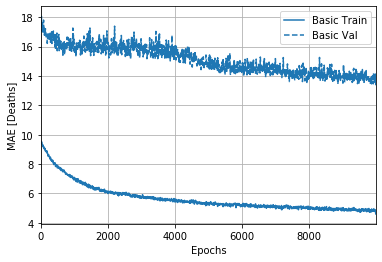

In [148]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [Deaths]')


Text(0, 0.5, 'MSE [Deaths^2]')

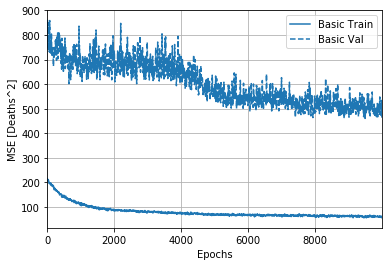

In [149]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [Deaths^2]')


Text(0, 0.5, 'Predictions [Deaths]')

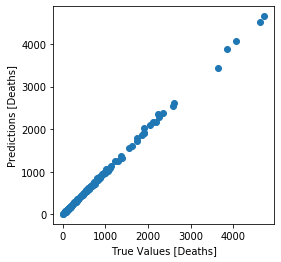

In [153]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Deaths]')
plt.ylabel('Predictions [Deaths]')


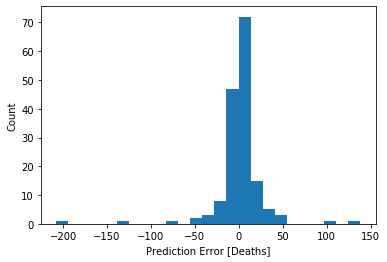

In [151]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Deaths]")
_ = plt.ylabel("Count")
